In [1]:
import pandas as pd
import numpy as np
import h5py
import os
import glob
from Perasonr import d1
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
print("successfully imported required libraries")

C:\Users\kaush\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


successfully imported required libraries


In [2]:
import tensorflow as tf
from tensorflow.keras import backend as K

# recall 
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# precision
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#f1 score
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
def dice_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.math.sigmoid(y_pred)
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return 1 - numerator / denominator
  
def custom_loss_function(y_true, y_pred):
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1)

In [3]:
from tensorflow import keras
model = keras.models.load_model("model_save.h5", custom_objects={'f1_m':f1_m, 'precision_m':precision_m, 'recall_m':recall_m , 'dice_loss':dice_loss,'custom_loss_function':custom_loss_function })

In [4]:
import os
print(os.getcwd())
os.chdir("Valid")
print(os.getcwd())

C:\Users\kaush\Desktop\Major_Project
C:\Users\kaush\Desktop\Major_Project\Valid


In [5]:
#1-245
validation_url = r"img/*.h5"
img_val = sorted(glob.glob(validation_url))
VAL_XX = np.zeros((245, 128, 128, 13))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

          # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

          # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0
        mid_aerosol = data[:,:,0].max() / 2.0
        mid_watervapour = data[:,:,9].max() / 2.0
        mid_nir = data[:,:,7].max() / 2.0
            
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_b8a = data[:, :, 8]
        data_11  = data[:,:,11]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        data_moisture = np.divide(data_b8a - data_11,np.add(data_b8a, data_11)) #moisture calculation
        data_geology = data[:,:,[12,11,2]]  #geology calculation
        mid_geology = data_geology.max() / 2.0
            
          
          # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
            
        VAL_XX[i, :, :, 6] = 1 - data[:, :, 0] / mid_aerosol #Aerosol
        VAL_XX[i, :, :, 7] = data_moisture #Moisture
        VAL_XX[i, :, :, 8] = 1 - data[:, :, 9] / mid_watervapour #Water Vapour
        VAL_XX[i, :, :, 9] = 1 - data[:, :, 7] / mid_nir #Near Infrared
        VAL_XX[i, :, :, 10] = 1 - data[:,:,12] / mid_geology #Geology
        VAL_XX[i, :, :, 11] = 1 - data[:,:,11] / mid_geology #Geology
        VAL_XX[i, :, :, 12] = 1 - data[:,:,2] / mid_geology #Geology
print(VAL_XX.shape)

  

0 img\image_1.h5
1 img\image_10.h5
2 img\image_100.h5
3 img\image_101.h5
4 img\image_102.h5
5 img\image_103.h5
6 img\image_104.h5
7 img\image_105.h5
8 img\image_106.h5
9 img\image_107.h5
10 img\image_108.h5
11 img\image_109.h5
12 img\image_11.h5
13 img\image_110.h5
14 img\image_111.h5
15 img\image_112.h5
16 img\image_113.h5
17 img\image_114.h5
18 img\image_115.h5
19 img\image_116.h5
20 img\image_117.h5
21 img\image_118.h5
22 img\image_119.h5
23 img\image_12.h5
24 img\image_120.h5
25 img\image_121.h5
26 img\image_122.h5
27 img\image_123.h5
28 img\image_124.h5
29 img\image_125.h5
30 img\image_126.h5
31 img\image_127.h5
32 img\image_128.h5
33 img\image_129.h5
34 img\image_13.h5
35 img\image_130.h5
36 img\image_131.h5
37 img\image_132.h5
38 img\image_133.h5
39 img\image_134.h5
40 img\image_135.h5
41 img\image_136.h5
42 img\image_137.h5
43 img\image_138.h5
44 img\image_139.h5
45 img\image_14.h5
46 img\image_140.h5
47 img\image_141.h5
48 img\image_142.h5
49 img\image_143.h5
50 img\image_144.

C:\Users\kaush\AppData\Local\Temp\ipykernel_10708\3508996533.py:28: RuntimeWarning: invalid value encountered in true_divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
C:\Users\kaush\AppData\Local\Temp\ipykernel_10708\3508996533.py:29: RuntimeWarning: invalid value encountered in true_divide
  data_moisture = np.divide(data_b8a - data_11,np.add(data_b8a, data_11)) #moisture calculation


172 img\image_33.h5
173 img\image_34.h5
174 img\image_35.h5
175 img\image_36.h5
176 img\image_37.h5
177 img\image_38.h5
178 img\image_39.h5
179 img\image_4.h5
180 img\image_40.h5
181 img\image_41.h5
182 img\image_42.h5
183 img\image_43.h5
184 img\image_44.h5
185 img\image_45.h5
186 img\image_46.h5
187 img\image_47.h5
188 img\image_48.h5
189 img\image_49.h5
190 img\image_5.h5
191 img\image_50.h5
192 img\image_51.h5
193 img\image_52.h5
194 img\image_53.h5
195 img\image_54.h5
196 img\image_55.h5
197 img\image_56.h5
198 img\image_57.h5
199 img\image_58.h5
200 img\image_59.h5
201 img\image_6.h5
202 img\image_60.h5
203 img\image_61.h5
204 img\image_62.h5
205 img\image_63.h5
206 img\image_64.h5
207 img\image_65.h5
208 img\image_66.h5
209 img\image_67.h5
210 img\image_68.h5
211 img\image_69.h5
212 img\image_7.h5
213 img\image_70.h5
214 img\image_71.h5
215 img\image_72.h5
216 img\image_73.h5
217 img\image_74.h5
218 img\image_75.h5
219 img\image_76.h5
220 img\image_77.h5
221 img\image_78.h5
222 

In [6]:
threshold = 0.5
print(VAL_XX.shape)
VAL_XX[np.isnan(VAL_XX)] = 0.000001
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
print(pred_img.shape)

(245, 128, 128, 13)
(245, 128, 128, 1)


In [8]:
a = ['Red','Green', 'Blue', 'NDVI', 'Slope', 'Eevation','Aerosol', 'Moisture', 'Water Vapor', 'NIR', 'Band-12', 'Band-11', 'Landslide']
d = pd.DataFrame( np.corrcoef([VAL_XX[:,:,:,i].flatten() for i in range(0,12)] , pred_img.flatten()), columns = a);d['Landslide'] = d1
d

,Red,Green,Blue,NDVI,Slope,Eevation,Aerosol,Moisture,Water Vapor,NIR,Band-12,Band-11,Landslide
0,1.000000,0.898819,0.817976,0.528682,-0.304826,-0.146568,0.615705,0.699968,0.254542,0.362233,-0.044715,0.849360,0.213659
1,0.898819,1.000000,0.959961,0.276810,-0.373438,-0.192760,0.701352,0.492401,0.268894,0.443419,0.062824,0.700402,0.213622
2,0.817976,0.959961,1.000000,0.321156,-0.397977,-0.218480,0.729024,0.393523,0.194620,0.261400,0.136250,0.556056,0.213645
3,0.528682,0.276810,0.321156,1.000000,-0.249938,-0.135437,0.300955,0.616897,-0.029961,-0.431462,-0.083975,0.333550,-0.405484
4,-0.304826,-0.373438,-0.397977,-0.249938,1.000000,0.663539,-0.337909,-0.486978,-0.324733,-0.158744,0.183619,-0.130282,0.196843
5,-0.146568,-0.192760,-0.218480,-0.135437,0.663539,1.000000,-0.164737,-0.318633,-0.041055,-0.045186,0.060308,-0.060726,0.413305
6,0.615705,0.701352,0.729024,0.300955,-0.337909,-0.164737,1.000000,0.303505,0.127773,0.201509,0.153293,0.501574,0.100310
7,0.699968,0.492401,0.393523,0.616897,-0.486978,-0.318633,0.303505,1.000000,0.313244,0.199437,-0.294321,0.691268,-0.435976
8,0.254542,0.268894,0.194620,-0.029961,-0.324733,-0.041055,0.127773,0.313244,1.000000,0.367238,-0.187773,0.282479,0.218760
9,0.362233,0.443419,0.261400,-0.431462,-0.158744,-0.045186,0.201509,0.199437,0.367238,1.000000,-0.124143,0.466305,-0.091065


<Figure size 720x1080 with 0 Axes>

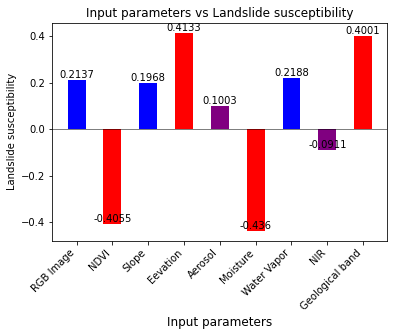

In [10]:
import matplotlib.pyplot as plt

a =      ['RGB Image', 'NDVI',    'Slope',   'Eevation','Aerosol', 'Moisture', 'Water Vapor', 'NIR',     'Geological band']
y =      [0.213651,    -0.405484, 0.196843, 0.413305,   0.100310, -0.435976,   0.218760,     -0.091065, 0.400135]
colors = ['blue',      'red',     'blue',    'red',      'purple',  'red',     'blue',        'purple',   'red']
plt.figure(figsize=(10, 15))
fig, ax = plt.subplots()
rects = ax.bar(a, y, width=0.5, color=colors)
ax.axhline(y=0, color='black', linewidth=0.5)
plt.title("Input parameters vs Landslide susceptibility")
plt.xlabel("Input parameters", fontsize=12)
plt.ylabel("Landslide susceptibility")
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-labels by 45 degrees and align to the right
plt.grid(False)

# Add values at the top of the bars
for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height,
            round(y[i],4),
            ha='center', va='bottom', fontsize=10)

plt.show()